In [ ]:
# !pip install arviz -q
# !pip install theano-pymc -q
# !pip install pymc3==3.10.0 -q #

!pip install arviz==0.6.1 -q
!pip install pymc3==3.8 -q
!pip install Theano==1.0.4 -q

     |████████████████████████████████| 1.4MB 7.9MB/s 
     |████████████████████████████████| 4.7MB 33.6MB/s 
     |████████████████████████████████| 317kB 24.1MB/s 
     |████████████████████████████████| 911kB 8.1MB/s 
     |████████████████████████████████| 2.8MB 7.9MB/s 


In [ ]:
import numpy as np
# import scipy as sp
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import theano.tensor as tt
# import scipy.stats as stats
import arviz as az
from google.colab import files

print('Running on PyMC3 v{}'.format(pm.__version__))
print('Running on ArviZ v{}'.format(az.__version__))

Running on PyMC3 v3.8
Running on ArviZ v0.6.1


## Metamodel containing all surrogate models and their coupling

In [ ]:
uploaded = files.upload() 

!ls

Saving trace1_summary to trace1_summary
Saving trace3_summary to trace3_summary
Saving trace2_summary to trace2_summary
sample_data  trace1_summary  trace2_summary  trace3_summary


In [ ]:

trace1_summary_r = pd.read_pickle('trace1_summary')
trace2_summary_r = pd.read_pickle('trace2_summary')
trace3_summary_r = pd.read_pickle('trace3_summary') 

# displaying the rv names and the data of intersest: 'mean' and 'sd':
mean_sd_r = trace1_summary_r.loc[:, ['mean','sd']]
mean_sd_r

,mean,sd
rv_intercept_dep_KS1,44.225,4.039
rv_slope_t_dep_KS1,1.239,0.048
rv_slope_k_dep_KS1,0.621,0.049
rv_noise_dep_KS1,13.834,1.022


In [ ]:
use_wTCR = False
use_wCD45 = False
use_sigmoid = False

### model1:

if use_sigmoid:
    
    # devisor_t, TruncatedNormal:
    lower_rv_divisor_t_dep_KS1 = 0
    upper_rv_divisor_t_dep_KS1 = None

    # devisor_k, TruncatedNormal:
    lower_rv_divisor_k_dep_KS1 = 0
    upper_rv_divisor_k_dep_KS1 = None

    # min, TruncatedNormal:
    lower_rv_min_dep_KS1 = None
    upper_rv_min_dep_KS1 = 0

    # max, TruncatedNormal:
    lower_rv_max_dep_KS1 = 20
    upper_rv_max_dep_KS1 = None

else:
    pass()

### model2:
lower_rv_maxDiff_lambdaALCK_LA2 = 0.0
upper_rv_maxDiff_lambdaALCK_LA2 = None

# devisor_logDiff:
lower_rv_devisor_logDiff_lambdaALCK_LA2 = None
upper_rv_devisor_logDiff_lambdaALCK_LA2 = 0

# maxPoff:
lower_rv_maxPoff_lambdaALCK_LA2 = 0.0
upper_rv_maxPoff_lambdaALCK_LA2 = None

# devisor_logPoff:
lower_rv_devisor_logPoff_lambdaALCK_LA2 = 0
upper_rv_devisor_logPoff_lambdaALCK_LA2 = None

### model3:
### rTCRrMean_TP3: ##################
lower_rv_devisor_decayLength_rTCRrMean_TP3 = 0
upper_rv_devisor_decayLength_rTCRrMean_TP3 = None

# min_decayLength_rTCRrMean, Normal:
lower_rv_min_decayLength_rTCRrMean_TP3 = 0
upper_rv_min_decayLength_rTCRrMean_TP3 = 16 # ?

# max_decayLength_rTCRrMean, Normal:
lower_rv_max_decayLength_rTCRrMean_TP3 = 16 # ?
upper_rv_max_decayLength_rTCRrMean_TP3 = None

### rTCRhMean: ###################
# sigma_decayLength_rTCRhMean, Normal:
mu_rv_sigma_decayLength_rTCRhMean_TP3 = 70.0
sd_rv_sigma_decayLength_rTCRhMean_TP3 = 10.0


In [ ]:
use_wTCR = False
use_wCD45 = False
use_sigmoid = False

def get_metamodel(observed_t_KS1 = None,
                  observed_k_KS1 = None,
                  observed_logPoff_LA2 = None, 
                  observed_logDiff_LA2 = None,
                  observed_rTCRrMean_TP3 = None,
                  observed_rTCRhMean_TP3 = None):
    
    ''' return a metamodel with all surrogate models '''

    metamodel = pm.Model()
    with metamodel:
        ### model1 - KS (kinetic segregation) ###########################    
        if True: # direction == 'A':
            param_t_KS1 = pm.Uniform('param_t_KS1', 0, 100, observed = observed_t_KS1)
            param_k_KS1 = pm.Uniform('param_k_KS1', 0, 100, observed = observed_k_KS1)

        # dw_TCR_KS ####################################################
        if use_wTCR:
            # surface t slope:
            rv_slope_t_wTCR_KS1 = pm.HalfNormal('rv_slope_t_wTCR_KS1', 
                      sd = trace1_summary_r.loc['rv_slope_t_wTCR_KS1','mean']) 

            # surface k slope:
            rv_slope_k_wTCR_KS1 = pm.HalfNormal('rv_slope_k_wTCR_KS1', 
                      sd = trace1_summary_r.loc['rv_slope_k_wTCR_KS1','mean']) 
            
            # surface intercept:
            rv_intercept_wTCR_KS1 = pm.Normal('rv_intercept_wTCR_KS1', 
                    mu = trace1_summary_r.loc['rv_intercept_wTCR_KS1','mean'],
                    sd = trace1_summary_r.loc['rv_intercept_wTCR_KS1','sd']) 

            # noise:
            rv_noise_wTCR_KS1 = pm.HalfNormal('rv_noise_wTCR_KS1', 
                    sd = trace1_summary_r.loc['rv_noise_wTCR_KS1','mean'])  
            
            # wTCR:
            rv_wTCR_KS1 = pm.Normal('rv_wTCR_KS1', mu = rv_intercept_wTCR_KS1 +\
                                    rv_slope_t_wTCR_KS1*param_rv_t +\
                                    rv_slope_k_wTCR_KS1*param_rv_k,
                                    sd = rv_noise_wTCR_KS1) #   

        # w_CD45_KS ####################################################
        if use_wCD45:
            # surface t slope:
            rv_slope_t_wCD45_KS1 = pm.HalfNormal('rv_slope_t_wCD45_KS1',
                       sd = trace1_summary_r.loc['rv_slope_t_wCD45_KS1','mean']) 

            # surface k slope:
            rv_slope_k_wCD45_KS1 = pm.HalfNormal('rv_slope_k_wCD45_KS1', 
                       sd = trace1_summary_r.loc['rv_slope_k_wCD45_KS1','mean']) 

            # surface intercept:
            rv_intercept_wCD45_KS1 = pm.Normal('rv_intercept_wCD45_KS1', 
                     mu = trace1_summary_r.loc['rv_intercept_wCD45_KS1','mean'], 
                     sd = trace1_summary_r.loc['rv_intercept_wCD45_KS1','sd']) 

            # noise:
            rv_noise_wCD45_KS1 = pm.HalfNormal('rv_noise_wCD45_KS1', 
                     sd = trace1_summary_r.loc['rv_noise_wCD45_KS1','mean']) 

            # wCD45:
            rv_wCD45_KS1 = pm.Normal('rv_wCD45_KS',
                                    mu = rv_intercept_wCD45_KS1 +\
                                    rv_slope_t_wCD45_KS1*param_rv_t +\
                                    rv_slope_k_wCD45_KS1*param_rv_k,
                                    sd = rv_noise_wCD45_KS1) #

        # dep_KS #####################################################
        if use_sigmoid:
            # sigmoid center t:
            rv_center_t_dep_KS1 = pm.Normal('rv_center_t_dep_KS1',
                  mu = trace1_summary_r.loc['rv_center_t_dep_KS1','mean'], 
                  sd = trace1_summary_r.loc['rv_center_t_dep_KS1','sd'])
            
            # sigmoid devisor t:
            rv_divisor_t_dep_KS1 = pm.TruncatedNormal('rv_divisor_t_dep_KS1',
                            mu = trace1_summary_r.loc['rv_divisor_t_dep_KS1','mean'],
                            sd = trace1_summary_r.loc['rv_divisor_t_dep_KS1','sd'],
                            lower = lower_rv_divisor_t_dep_KS1,
                            upper = upper_rv_divisor_t_dep_KS1)
            
            # sigmoid center t:
            rv_center_k_dep_KS1 = pm.Normal('rv_center_k_dep_KS1',
                  mu = trace1_summary_r.loc['rv_center_k_dep_KS1','mean'], 
                  sd = trace1_summary_r.loc['rv_center_k_dep_KS1','sd'])
            
            # sigmoid devisor t:
            rv_divisor_k_dep_KS1 = pm.TruncatedNormal('rv_divisor_k_dep_KS1',
                            mu = trace1_summary_r.loc['rv_divisor_k_dep_KS1','mean'], 
                            sd = trace1_summary_r.loc['rv_divisor_k_dep_KS1','mean'],
                            lower = lower_rv_divisor_k_dep_KS1,
                            upper = upper_rv_divisor_k_dep_KS1)

            # sigmoid min:        
            rv_min_dep_KS1 = pm.TruncatedNormal('rv_min_dep_KS1',
                      mu = trace1_summary_r.loc['rv_min_dep_KS1','mean'],
                      sd = trace1_summary_r.loc['rv_min_dep_KS1','sd'],
                      lower = lower_rv_min_dep_KS1,
                      upper = upper_rv_min_dep_KS1)
            
            # sigmoid max:
            rv_max_dep_KS1 = pm.TruncatedNormal('rv_max_dep_KS1',
                      mu = trace1_summary_r.loc['rv_max_dep_KS1','mean'],
                      sd = trace1_summary_r.loc['rv_max_dep_KS1','mean'],
                      lower = lower_rv_max_dep_KS1,
                      upper = upper_rv_max_dep_KS1)

            # sigmoids ratio:
            rv_sigRatio_dep_KS1 = pm.Normal('rv_sigRatio_dep_KS1',
                  mu = trace1_summary_r.loc['rv_sigRatio_dep_KS1','mean'],
                  sd = trace1_summary_r.loc['rv_sigRatio_dep_KS1','sd'])

            # noise: 
            rv_noise_dep_KS1 = pm.HalfNormal('rv_noise_dep_KS1',
                   sd = trace1_summary_r.loc['rv_noise_dep_KS1','mean'])

            # exponent of sigmoid t:
            rv_tmp_x2 = (param_rv_t - rv_center_t_dep_KS1)/rv_divisor_t_dep_KS1

            # sigmoid t:
            rv_tmp_sig2 = 1.0/(1 + np.exp(-rv_tmp_x2))

            # exponent of sigmoid k:
            rv_tmp_x1 = (param_rv_k - rv_center_k_dep_KS1)/rv_divisor_k_dep_KS1

            # sigmoid k:
            rv_tmp_sig1 = 1.0/(1 + np.exp(-rv_tmp_x1))
            
            # dep:
            rv_dep_KS = pm.Normal('rv_dep_KS', mu = rv_min_dep_KS1 +\
                                  (rv_max_dep_KS1 - rv_min_dep_KS1)*\
                                   rv_tmp_sig1 + rv_sigRatio_dep_KS1*rv_tmp_sig2,
                                   sd = rv_noise_dep_KS1)
                   
        else: # linear model1 and not sigmoid
            # rv_***_t_dep_KS1
            # surface t slope
            rv_slope_t_dep_KS1 = pm.HalfNormal('rv_slope_t_dep_KS1', 
                     sd = trace1_summary_r.loc['rv_slope_t_dep_KS1','mean'])
            
            # rv_***_k_dep_KS1
            # surface k slope
            rv_slope_k_dep_KS1 = pm.HalfNormal('rv_slope_k_dep_KS1', 
                     sd = trace1_summary_r.loc['rv_slope_k_dep_KS1','mean'])
            
            # rv_***_dep_KS1
            # surface intercept
            rv_intercept_dep_KS1 = pm.Normal('rv_intercept_dep_KS1', 
                   mu = trace1_summary_r.loc['rv_intercept_dep_KS1','mean'], 
                   sd = trace1_summary_r.loc['rv_intercept_dep_KS1','sd'])
            
            # noise 
            rv_noise_dep_KS1 = pm.HalfNormal('rv_noise_dep_KS1', 
                   sd = trace1_summary_r.loc['rv_noise_dep_KS1','mean'])
            
            # rv_wCD45_KS1, equation:
            rv_dep_KS1 = pm.Normal('rv_dep_KS1', mu = rv_intercept_dep_KS1 +\
                                    rv_slope_t_dep_KS1*param_t_KS1 +\
                                    rv_slope_k_dep_KS1*param_k_KS1,
                                    sd = rv_noise_dep_KS1) #


        ############################################################
        ### model2 - LA (LCK activation) ###########################
        if True: # direction == 'A':
            param_logDiff_LA2 = pm.Uniform('param_logDiff_LA2', -3, 0, observed = observed_logDiff_LA2)
            param_logPoff_LA2 = pm.Uniform('param_logPoff_LA2', -5, 0, observed = observed_logPoff_LA2)
            
            # rv_logDiff_LA2 = pm.Normal('rv_logDiff_LA2', 
            #                            mu = observed_logDiff_LA2, 
            #                            sd = 0.5)
            # rv_logPoff_LA2 = pm.Uniform('rv_logPoff_LA2', 
            #                             observed_logPoff_LA2, 0.5)

        # noise
        rv_noise_lambdaALCK_LA2 = \
                        pm.HalfNormal('rv_noise_lambdaALCK_LA2',
            sd = trace2_summary_r.loc['rv_noise_lambdaALCK_LA2','mean']) 
        
        # Diff sigmoid max:
        rv_maxDiff_lambdaALCK_LA2 = pm.TruncatedNormal('rv_maxDiff_lambdaALCK_LA2', 
                             mu = trace2_summary_r.loc['rv_maxDiff_lambdaALCK_LA2','mean'],
                             sd = trace2_summary_r.loc['rv_maxDiff_lambdaALCK_LA2','sd'],
                             lower = lower_rv_maxDiff_lambdaALCK_LA2,
                             upper = upper_rv_maxDiff_lambdaALCK_LA2)
        
        # Diff sigmoid center:
        rv_center_logDiff_lambdaALCK_LA2 = pm.Normal('rv_center_logDiff_lambdaALCK_LA2',
                           mu = trace2_summary_r.loc['rv_center_logDiff_lambdaALCK_LA2','mean'],
                           sd = trace2_summary_r.loc['rv_center_logDiff_lambdaALCK_LA2','sd'])
        
        # Diff sigmoid devisor:
        rv_devisor_logDiff_lambdaALCK_LA2 = pm.TruncatedNormal('rv_devisor_logDiff_lambdaALCK_LA2',
                                     mu = trace2_summary_r.loc['rv_devisor_logDiff_lambdaALCK_LA2','mean'],
                                     sd = trace2_summary_r.loc['rv_devisor_logDiff_lambdaALCK_LA2','sd'],
                                     lower = lower_rv_devisor_logDiff_lambdaALCK_LA2,
                                     upper = upper_rv_devisor_logDiff_lambdaALCK_LA2)
        
        # Poff sigmoid max:
        rv_maxPoff_lambdaALCK_LA2 = pm.TruncatedNormal('rv_maxPoff_lambdaALCK_LA2', 
                              mu = trace2_summary_r.loc['rv_maxPoff_lambdaALCK_LA2','mean'],
                              sd = trace2_summary_r.loc['rv_maxPoff_lambdaALCK_LA2','sd'],
                              lower = lower_rv_maxPoff_lambdaALCK_LA2,
                              upper = upper_rv_maxPoff_lambdaALCK_LA2)
        
        # Poff sigmoid center:        
        rv_center_logPoff_lambdaALCK_LA2 = pm.Normal('rv_center_logPoff_lambdaALCK_LA2',
                           mu = trace2_summary_r.loc['rv_center_logPoff_lambdaALCK_LA2','mean'],
                           sd = trace2_summary_r.loc['rv_center_logPoff_lambdaALCK_LA2','sd'])
        
        # Poff sigmoid devisor:
        rv_devisor_logPoff_lambdaALCK_LA2 = pm.TruncatedNormal('rv_devisor_logPoff_lambdaALCK_LA2', 
                                     mu = trace2_summary_r.loc['rv_devisor_logPoff_lambdaALCK_LA2','mean'], 
                                     sd = trace2_summary_r.loc['rv_devisor_logPoff_lambdaALCK_LA2','mean'],
                                     lower = lower_rv_devisor_logPoff_lambdaALCK_LA2,
                                     upper = upper_rv_devisor_logPoff_lambdaALCK_LA2)

        # exponent of logDiff sigmoid:
        rv_tmp_x1 = (param_logDiff_LA2 - rv_center_logDiff_lambdaALCK_LA2)/\
        rv_devisor_logDiff_lambdaALCK_LA2

        # logDiff sigmoid:
        rv_tmp_sig1 = rv_maxDiff_lambdaALCK_LA2/(1 + np.exp(-rv_tmp_x1))

        # exponent of logPoff sigmoid:
        rv_tmp_x2 = (param_logPoff_LA2 - rv_center_logPoff_lambdaALCK_LA2)/\
        rv_devisor_logPoff_lambdaALCK_LA2

        # logpoff sigmoid:
        rv_tmp_sig2 = rv_maxPoff_lambdaALCK_LA2/(1 + np.exp(-rv_tmp_x2))

        # lambdaALCK:
        rv_lambdaALCK_LA2 = pm.Normal('rv_lambdaALCK_LA2', 
                                       mu = rv_tmp_sig1*rv_tmp_sig2,
                                       sd = rv_noise_lambdaALCK_LA2)

        ### Coupling: ###############################################
        ### from models to coupled: #################################
        ### from model1: 
        if use_wTCR:
            rv_wTCR_C = pm.Normal('rv_wTCR_C', 
                                   mu = rv_wTCR_KS1, 
                                   sd = 20)

        if use_wCD45:           
            rv_wCD45_C = pm.Normal('rv_wCD45_C', 
                                    mu = rv_wCD45_KS1, 
                                    sd = 20)
                 
        rv_dep_C = pm.Normal('rv_dep_C', 
                              mu = rv_dep_KS1, 
                              sd = 20) 
        
        ### from model2: 
        # rv_lambdaALCK_C = pm.Normal('rv_lambdaALCK_C', 
        #                              mu = rv_lambdaALCK_LA2, 
        #                              sd = 2)

        rv_decayLength_C = pm.Normal('rv_decayLength_C', 
                                   mu = 1/rv_lambdaALCK_LA2, # !!!!
                                   sd = 50) 
        
        rv_depletion_C = pm.Normal('rv_depletion_C', 
                                   mu = rv_dep_C, 
                                   sd = 30)
        
        ### from coupled to models: #####################
        ### to model3: 
        rv_decayLength_TP3 = pm.Normal('rv_decayLength_TP3',
                                           mu = rv_decayLength_C,
                                           sd = 30)

        rv_depletion_TP3 = pm.Normal('rv_depletion_TP3',
                                      mu = rv_dep_C,
                                      sd = 30)

        ### model3: ##########################################
        ### rTCRrMean ########################################
        # noise
        rv_noise_rTCRrMean_TP3 = \
                        pm.HalfNormal('rv_noise_rTCRrMean_TP3', 
            sd = trace3_summary_r.loc['rv_noise_rTCRrMean_TP3','mean']) 

        # sigmoid center of decayLength_rTCRrMean:
        rv_center_decayLength_rTCRrMean_TP3 = \
                        pm.Normal('rv_center_decayLength_rTCRrMean_TP3',
        mu = trace3_summary_r.loc['rv_center_decayLength_rTCRrMean_TP3','mean'], 
        sd = trace3_summary_r.loc['rv_center_decayLength_rTCRrMean_TP3','sd'])
        
        # sigmoid devisor of decayLength_rTCRrMean:
        rv_devisor_decayLength_rTCRrMean_TP3 = \
                        pm.TruncatedNormal('rv_devisor_decayLength_rTCRrMean_TP3',
                 mu = trace3_summary_r.loc['rv_devisor_decayLength_rTCRrMean_TP3','mean'],
                 sd = trace3_summary_r.loc['rv_devisor_decayLength_rTCRrMean_TP3','sd'],
                 lower = lower_rv_devisor_decayLength_rTCRrMean_TP3,
                 upper = upper_rv_devisor_decayLength_rTCRrMean_TP3)
        
        # sigmoid min of decayLength_rTCRrMean:
        rv_min_decayLength_rTCRrMean_TP3 = \
                        pm.Normal('rv_min_decayLength_rTCRrMean_TP3',
        mu = trace3_summary_r.loc['rv_min_decayLength_rTCRrMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_min_decayLength_rTCRrMean_TP3','sd'])
        
        # sigmoid max of decayLength_rTCRrMean:
        rv_max_decayLength_rTCRrMean_TP3 = \
                        pm.Normal('rv_max_decayLength_rTCRrMean_TP3',
        mu = trace3_summary_r.loc['rv_max_decayLength_rTCRrMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_max_decayLength_rTCRrMean_TP3','sd'])

        # decayLength_rTCRrMean:
        rv_decayLength_rTCRrMean_TP3 = \
        (rv_min_decayLength_rTCRrMean_TP3 + \
        (rv_max_decayLength_rTCRrMean_TP3 - rv_min_decayLength_rTCRrMean_TP3)*\
        np.exp(-(rv_decayLength_TP3 - rv_center_decayLength_rTCRrMean_TP3)/\
                     rv_devisor_decayLength_rTCRrMean_TP3))

        
        ### rv_***_depletion_rTCRrMean_TP ##################
        # intercept of depletion_rTCRrMean:
        rv_intercept_depletion_rTCRrMean_TP3 = \
                        pm.Normal('rv_intercept_depletion_rTCRrMean_TP3',
        mu = trace3_summary_r.loc['rv_intercept_depletion_rTCRrMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_intercept_depletion_rTCRrMean_TP3','sd'])
        
        # logSlope of depletion_rTCRrMean:
        rv_logSlope_depletion_rTCRrMean_TP3 = \
                        pm.Normal('rv_logSlope_depletion_rTCRrMean_TP3',
        mu = trace3_summary_r.loc['rv_logSlope_depletion_rTCRrMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_logSlope_depletion_rTCRrMean_TP3','sd'])
        
        # line of depletion_rTCRrMean:
        rv_depletion_rTCRrMean_TP3 = \
        rv_intercept_depletion_rTCRrMean_TP3 + \
        (10**rv_logSlope_depletion_rTCRrMean_TP3)*rv_depletion_TP3
        
        ## rTCRrMean:
        rv_rTCRrMean_TP3 = \
                pm.Normal('rv_rTCRrMean_TP3', 
                mu = rv_decayLength_rTCRrMean_TP3 + \
                rv_depletion_rTCRrMean_TP3, 
                sd = rv_noise_rTCRrMean_TP3,
                observed = observed_rTCRrMean_TP3)
             
        ### rv_***_decayLength_rTCRhMean_TP: ################
        # noise:
        rv_noise_rTCRhMean_TP3 = \
                    pm.HalfNormal('rv_noise_rTCRhMean_TP3', 
        sd = trace3_summary_r.loc['rv_noise_rTCRhMean_TP3','mean']) 

        # gaussian sigma of decayLength_rTCRhMean:
        rv_sigma_decayLength_rTCRhMean_TP3 = \
                        pm.Normal('rv_sigma_decayLength_rTCRhMean_TP3',
        mu = trace3_summary_r.loc['rv_sigma_decayLength_rTCRhMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_sigma_decayLength_rTCRhMean_TP3','sd'])
        
        # gaussian mu of decayLength_rTCRhMean:
        rv_mu_decayLength_rTCRhMean_TP3 = \
                        pm.Normal('rv_mu_decayLength_rTCRhMean_TP3',
        mu = trace3_summary_r.loc['rv_mu_decayLength_rTCRhMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_mu_decayLength_rTCRhMean_TP3','sd'])

        # gaussian scale of decayLength_rTCRhMean:
        rv_scale_decayLength_rTCRhMean_TP3 = \
                        pm.Normal('rv_scale_decayLength_rTCRhMean_TP3',
        mu = trace3_summary_r.loc['rv_scale_decayLength_rTCRhMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_scale_decayLength_rTCRhMean_TP3','sd'])
         
        # gaussian of decayLength_rTCRhMean:
        rv_decayLength_rTCRhMean_TP3 = \
        rv_scale_decayLength_rTCRhMean_TP3*\
        np.exp(-0.5*((rv_decayLength_TP3 - rv_mu_decayLength_rTCRhMean_TP3)/\
                     rv_sigma_decayLength_rTCRhMean_TP3)**2)
        
        # line intercept of depletion_rTCRhMean:
        rv_intercept_depletion_rTCRhMean_TP3 = \
                        pm.Normal('rv_intercept_depletion_rTCRhMean_TP3',
        mu = trace3_summary_r.loc['rv_intercept_depletion_rTCRhMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_intercept_depletion_rTCRhMean_TP3','sd'])
        
        # line slope of depletion_rTCRhMean:
        rv_logSlope_depletion_rTCRhMean_TP3 = \
                        pm.Normal('rv_logSlope_depletion_rTCRhMean_TP3',
        mu = trace3_summary_r.loc['rv_logSlope_depletion_rTCRhMean_TP3','mean'],
        sd = trace3_summary_r.loc['rv_logSlope_depletion_rTCRhMean_TP3','sd'])
        
        # line of depletion_rTCRhMean:
        rv_depletion_rTCRhMean_TP3 = rv_intercept_depletion_rTCRhMean_TP3 + \
        -(10**rv_logSlope_depletion_rTCRhMean_TP3)*rv_depletion_TP3
        
        # rTCRhMean:
        rv_rTCRhMean_TP3 = \
        pm.Normal('rv_rTCRhMean_TP3', 
                  mu = rv_decayLength_rTCRhMean_TP3 + \
                  rv_depletion_rTCRhMean_TP3, 
                  sd = rv_noise_rTCRhMean_TP3,
                  observed = observed_rTCRhMean_TP3)
        
        
    return metamodel


Direction A (KS, LA to TP):

In [ ]:
# Direction A (KS1, LA2 to TP3):
metamodel = get_metamodel(observed_t_KS1 = 75.0,
                         observed_k_KS1 = 25.0,
                         observed_logPoff_LA2 = -3.0,
                         observed_logDiff_LA2 = -2.0,
                         observed_rTCRrMean_TP3 = None,
                         observed_rTCRhMean_TP3 = None)


In [ ]:
with metamodel:
    trace_metamodel = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [rv_rTCRhMean_TP3, rv_logSlope_depletion_rTCRhMean_TP3, rv_intercept_depletion_rTCRhMean_TP3, rv_scale_decayLength_rTCRhMean_TP3, rv_mu_decayLength_rTCRhMean_TP3, rv_sigma_decayLength_rTCRhMean_TP3, rv_noise_rTCRhMean_TP3, rv_rTCRrMean_TP3, rv_logSlope_depletion_rTCRrMean_TP3, rv_intercept_depletion_rTCRrMean_TP3, rv_max_decayLength_rTCRrMean_TP3, rv_min_decayLength_rTCRrMean_TP3, rv_devisor_decayLength_rTCRrMean_TP3, rv_center_decayLength_rTCRrMean_TP3, rv_noise_rTCRrMean_TP3, rv_depletion_TP3, rv_decayLength_TP3, rv_depletion_C, rv_decayLength_C, rv_dep_C, rv_lambdaALCK_LA2, rv_devisor_logPoff_lambdaALCK_LA2, rv_center_logPoff_lambdaALCK_LA2, rv_maxPoff_lambdaALCK_LA2, rv_devisor_logDiff_lambdaALCK_LA2, rv_center_logDiff_lambdaALCK_LA2, rv_maxDiff_lambdaALCK_LA2, rv_noise_lambdaALCK_LA2, rv_dep_KS1, rv_noise_dep_KS1, rv_intercept_dep_KS1, rv_slope_k_dep_KS1, rv_sl

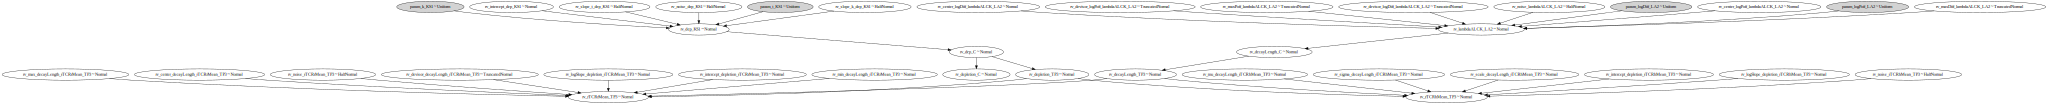

In [ ]:
gv_metamodel = pm.model_to_graphviz(metamodel)
display(gv_metamodel)

# from google.colab import files
# gv_metamodel.render("metamodel_graph", format="png")
# files.download("metamodel_graph.png") # Download locally from colab

In [ ]:
trace_metamodel_summary = pm.summary(trace_metamodel).round(3) # var_names=["mu", "tau"]
trace_metamodel_summary.to_pickle('trace_metamodel_summary')
if False: 
    files.download("trace_metamodel_summary") 
!ls

sample_data	trace2_summary	trace_metamodel_summary
trace1_summary	trace3_summary


In [ ]:
# r = read, to distinguish between the original and the saved files.
trace_metamodel_summary_r = pd.read_pickle('trace_metamodel_summary') 

# displaying the rv names and the data of intersest: 'mean' and 'sd':
trace_metamodel_mean_sd_r = trace_metamodel_summary_r.loc[:, ['mean','sd']]
trace_metamodel_mean_sd_r

In [ ]:
pm.traceplot(trace_metamodel);

In [ ]:
# !cat /proc/cpuinfo

In [ ]:
# vars(metamodel)

In [ ]:
pm.summary(trace_metamodel, ['rv_depletion_TP3','rv_decayLength_TP3'])


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
rv_depletion_TP3,129.868,67.981,11.415,263.323,2.375,1.680,820.0,819.0,854.0,1378.0,1.00
rv_decayLength_TP3,38.853,78.496,-89.482,176.826,20.931,15.119,14.0,14.0,12.0,151.0,1.25


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


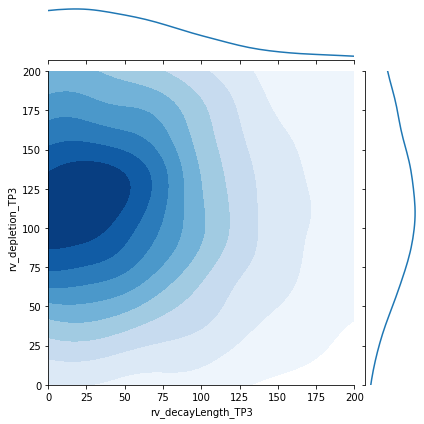

In [ ]:
# import seaborn as sns
df_trace_metamodel = pm.trace_to_dataframe(trace_metamodel)
df_trace_metamodel
sns.jointplot(df_trace_metamodel.loc[:,'rv_decayLength_TP3'], 
              df_trace_metamodel.loc[:,'rv_depletion_TP3'],
              kind='kde', xlim=(0, 200), ylim=(0, 200), n_levels=10,
              shade=True, cmap='Blues', shade_lowest=False);

# Label='iris_virginica', color='b', color='r', cmap="Blues"
# box_x0 = [0, 1, 1, 0, 0]
# box_y0 = [0, 0, 1, 1, 0]
# plt.plot(0,0,'r.')
# plt.plot(200*box_x0, 200*box_y0, 'r-')
# sns.jointplot(dftrace.iloc[:, 0], dftrace.iloc[:, 1], kind='kde')

Direction B (TP to KS, LA):

In [ ]:
# Direction B (TP3 to KS1, LA2):
metamodel= get_metamodel(observed_t_KS1 = None,
                         observed_k_KS1 = None,
                         observed_logPoff_LA2 = None,
                         observed_logDiff_LA2 = None,
                         observed_rTCRrMean_TP3 = 15.0,
                         observed_rTCRhMean_TP3 = 0.04) 


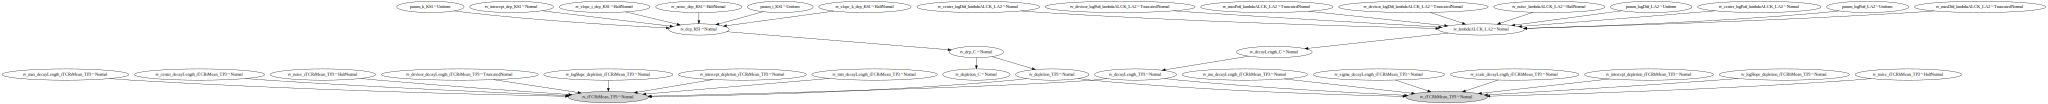

In [ ]:
gv_metamodel = pm.model_to_graphviz(metamodel)
display(gv_metamodel)

In [ ]:
with metamodel:
    trace_metamodel = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [rv_logSlope_depletion_rTCRhMean_TP3, rv_intercept_depletion_rTCRhMean_TP3, rv_scale_decayLength_rTCRhMean_TP3, rv_mu_decayLength_rTCRhMean_TP3, rv_sigma_decayLength_rTCRhMean_TP3, rv_noise_rTCRhMean_TP3, rv_logSlope_depletion_rTCRrMean_TP3, rv_intercept_depletion_rTCRrMean_TP3, rv_max_decayLength_rTCRrMean_TP3, rv_min_decayLength_rTCRrMean_TP3, rv_devisor_decayLength_rTCRrMean_TP3, rv_center_decayLength_rTCRrMean_TP3, rv_noise_rTCRrMean_TP3, rv_depletion_TP3, rv_decayLength_TP3, rv_depletion_C, rv_decayLength_C, rv_dep_C, rv_lambdaALCK_LA2, rv_devisor_logPoff_lambdaALCK_LA2, rv_center_logPoff_lambdaALCK_LA2, rv_maxPoff_lambdaALCK_LA2, rv_devisor_logDiff_lambdaALCK_LA2, rv_center_logDiff_lambdaALCK_LA2, rv_maxDiff_lambdaALCK_LA2, rv_noise_lambdaALCK_LA2, param_logPoff_LA2, param_logDiff_LA2, rv_dep_KS1, rv_noise_dep_KS1, rv_intercept_dep_KS1, rv_slope_k_dep_KS1, rv_

In [ ]:
# vars(metamodel)

In [ ]:
pm.summary(trace_metamodel, ['param_t_KS1','param_k_KS1','param_logPoff_LA2','param_logDiff_LA2'])


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
param_t_KS1,44.611,30.193,0.006,93.381,4.053,3.199,56.0,45.0,68.0,147.0,1.05
param_k_KS1,44.959,27.910,0.247,91.831,0.520,0.453,2879.0,1895.0,3660.0,3901.0,1.01
param_logPoff_LA2,-2.904,1.260,-4.998,-0.762,0.024,0.017,2663.0,2663.0,2859.0,3136.0,1.02
param_logDiff_LA2,-1.446,0.853,-2.780,-0.015,0.041,0.029,438.0,438.0,875.0,4103.0,1.01


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


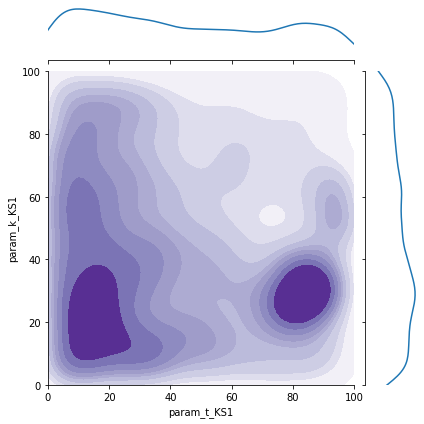

In [ ]:
df_trace_metamodel = pm.trace_to_dataframe(trace_metamodel)
df_trace_metamodel
sns.jointplot(df_trace_metamodel.loc[:,'param_t_KS1'], 
              df_trace_metamodel.loc[:,'param_k_KS1'], 
              kind='kde', xlim=(0, 100), ylim=(0, 100), n_levels=10,
              shade=True, cmap='Purples', shade_lowest=False);


In [ ]:
if False:
    plt.savefig('kde_model1.png')

!ls

kde_model1.png	trace1_summary	trace3_summary
sample_data	trace2_summary	trace_metamodel_summary


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


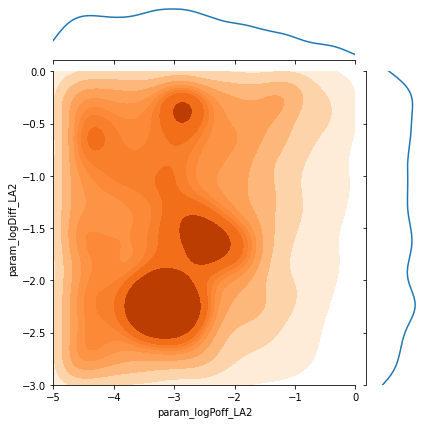

In [ ]:
df_trace_metamodel = pm.trace_to_dataframe(trace_metamodel)
df_trace_metamodel
sns.jointplot(df_trace_metamodel.loc[:,'param_logPoff_LA2'], 
              df_trace_metamodel.loc[:,'param_logDiff_LA2'],
              kind='kde', xlim=(-5, 0), ylim=(-3, 0), n_levels=10,
              shade=True, cmap='Oranges', shade_lowest=False);

In [ ]:
# metamodel = get_metamodel(depletion_array, decayLength_array, 
#                               rTCRrMean_array, rTCRhMean_array)
# gv_metamodel = pm.model_to_graphviz(metamodel)
# display(gv_metamodel)

In [ ]:
# chain_prop = {"linewidth": (.5, 1, 2, 3)}
# az.plot_trace(
#     idata, var_names=["home", "defs"], combined=True, chain_prop=chain_prop, compact=False, legend=True
# );

# import arviz as az

# az.style.use("arviz-darkgrid")


# with model:
#     pm.plot_posterior(trace, credible_interval=0.99)

# trace_fig = az.plot_trace(trace_g, var_names=[ 'τ', 'ϵ'],
# figsize=(12, 8));

# dftrace = pm.trace_to_dataframe(trace)
# sns.jointplot(dftrace.iloc[:, 0], dftrace.iloc[:, 1], kind='kde')

In [ ]:
        # if False: # direction == 'B':
        #     rv_decayLength_TP3 = pm.Uniform('rv_decayLength_TP3',
        #                                     0, 200, observed = observed_decayLength_TP3)
        #     rv_depletion_TP3 = pm.Uniform('rv_depletion_TP3', 
        #                                   0, 200, observed = observed_depletion_TP3) 



#### Helps:
https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

